In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv(r"/content/adult 3.csv")

In [ ]:
print(data.shape)
print(data.describe())
print(data.info())
print(data.head())

In [ ]:
print(data.isnull().sum())

In [ ]:
print(data.occupation.value_counts())

In [ ]:
data.replace('?',np.nan,inplace=True)
data.dropna(inplace=True)

In [ ]:
print(data.occupation.value_counts())
print(data["marital-status"].value_counts())
print(data["workclass"].value_counts())
print(data["native-country"].value_counts())
print(data["education"].value_counts())

In [ ]:
data = data[data["workclass"]!= "Without-pay"]
data = data[data["workclass"]!= "Never-worked"]

data = data[data["education"]!= "5th-6th"]
data = data[data["education"]!= "1st-4th"]
data = data[data["education"]!= "Preschool"]

In [ ]:
#reduece dimension
data.drop(columns=["education"],inplace = True)  #redundant features removal
data  # yeah we removed educational column

In [ ]:
# label encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data["workclass"]= encoder.fit_transform(data["workclass"])
data["marital-status"]= encoder.fit_transform(data["marital-status"])
data["occupation"]= encoder.fit_transform(data["occupation"])
data["relationship"]= encoder.fit_transform(data["relationship"])
data["race"]= encoder.fit_transform(data["race"])
data["gender"]= encoder.fit_transform(data["gender"])
data["native-country"]=encoder.fit_transform(data["native-country"])
data

In [ ]:
X = data.drop(columns =["income"]) # input
y = data["income"]  # outut
X

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}

# Train and evaluate
for name, model in models.items():
    pipe = Pipeline([
      ('scaler', StandardScaler()),
      ('model', model)
   ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name}: {acc:.4f}")
    print(classification_report(y_test, y_pred))


LogisticRegression: 0.8269
              precision    recall  f1-score   support

       <=50K       0.85      0.94      0.89      7479
        >50K       0.70      0.45      0.55      2290

    accuracy                           0.83      9769
   macro avg       0.78      0.70      0.72      9769
weighted avg       0.81      0.83      0.81      9769

RandomForest: 0.8648
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      7479
        >50K       0.75      0.64      0.69      2290

    accuracy                           0.86      9769
   macro avg       0.82      0.79      0.80      9769
weighted avg       0.86      0.86      0.86      9769

KNN: 0.8345
              precision    recall  f1-score   support

       <=50K       0.88      0.91      0.89      7479
        >50K       0.66      0.60      0.63      2290

    accuracy                           0.83      9769
   macro avg       0.77      0.75      0.76      9769
weighted avg  

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler # standard is convert mean value data = 0 , and std = 1

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'SVM': SVC()
} # here we  have created model object in single dictionary

results = {}

# Train and evaluate
for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"{name} Accuracy: {acc:.4f}")


import joblib
# Get best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\n✅ Best model: {best_model_name} with accuracy {results[best_model_name]:.4f}")

# Save the best model
joblib.dump(best_model, "best_model.pkl")
print("✅ Saved best model as best_model.pkl")

Logistic Regression Accuracy: 0.8269
Random Forest Accuracy: 0.8640
Gradient Boosting Accuracy: 0.8737
K-Nearest Neighbors Accuracy: 0.8345
SVM Accuracy: 0.8570

✅ Best model: Gradient Boosting with accuracy 0.8737
✅ Saved best model as best_model.pkl


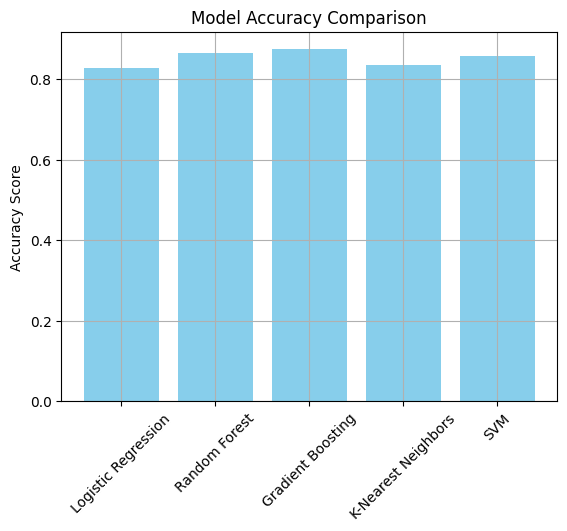

In [ ]:
import matplotlib.pyplot as plt

plt.bar(results.keys(), results.values(),color= "skyblue")
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

In [ ]:
!pip install -q streamlit

In [ ]:
! wget -q -O - ipv4.icanhazip.com

34.125.40.10


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load the trained model
model = joblib.load("best_model.pkl")

st.set_page_config(page_title="Employee Salary Classification", page_icon="💼", layout="centered")

st.title("💼 Employee Salary Classification App")
st.markdown("Predict whether an employee earns >50K or ≤50K based on input features.")

# Sidebar inputs (these must match your training feature columns)
st.sidebar.header("Input Employee Details")

# ✨ Replace these fields with your dataset's actual input columns
age = st.sidebar.slider("Age", 18, 65, 30)
education = st.sidebar.selectbox("Education Level", [
    "Bachelors", "Masters", "PhD", "HS-grad", "Assoc", "Some-college"
])
occupation = st.sidebar.selectbox("Job Role", [
    "Tech-support", "Craft-repair", "Other-service", "Sales",
    "Exec-managerial", "Prof-specialty", "Handlers-cleaners", "Machine-op-inspct",
    "Adm-clerical", "Farming-fishing", "Transport-moving", "Priv-house-serv",
    "Protective-serv", "Armed-Forces"
])
hours_per_week = st.sidebar.slider("Hours per week", 1, 80, 40)
experience = st.sidebar.slider("Years of Experience", 0, 40, 5)

# Building input DataFrame
input_df = pd.DataFrame({
    'age': [age],
    'education': [education],
    'occupation': [occupation],
    'hours-per-week': [hours_per_week],
    'experience': [experience]
})

st.write("### 🔎 Input Data")
st.write(input_df)


# Predict button
if st.button("Predict Salary Class"):
    prediction = model.predict(input_df)
    st.success(f"✅ Prediction: {prediction[0]}")


# Batch prediction
st.markdown("---")
st.markdown("#### 📂 Batch Prediction")
uploaded_file = st.file_uploader("Upload a CSV file for batch prediction", type="csv")

if uploaded_file is not None:
    batch_data = pd.read_csv(uploaded_file)
    st.write("Uploaded data preview:", batch_data.head())
    batch_preds = model.predict(batch_data)
    batch_data['PredictedClass'] = batch_preds
    st.write("✅ Predictions:")
    st.write(batch_data.head())
    csv = batch_data.to_csv(index=False).encode('utf-8')
    st.download_button("Download Predictions CSV", csv, file_name='predicted_classes.csv', mime='text/csv')


Overwriting app.py


In [ ]:
! pip install streamlit pyngrok

In [ ]:
!ngrok authtoken 30Mq4H1fnUQ9SmrHVr8osWNHVVz_5PH15PjPbEgFrxjbeQvS9

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
import os
import threading

def run_streamlit():
  os.system("streamlit run app.py --server.port 8501")

  thread = threading.Thread(targrt =run_streamlit)
  thread.start()

In [ ]:
from pyngrok import ngrok
import time

# wait a few second to make sure Strea,lit started
time.sleep(5)

# create a tunnel to the streamlit port 8501
public_url = ngrok.connect(8501)
print("your streamlit app is live here:", public_url)
!streamlit run --server.port 8501 app.py >/dev/null

your streamlit app is live here: NgrokTunnel: "https://720003f004f9.ngrok-free.app" -> "http://localhost:8501"
